**Preprocess**

In [1]:
#Preprocessing Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator;
#Model imports
from tensorflow.keras.applications import ResNet50,VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,BatchNormalization,Dropout
from tensorflow.keras.models import Sequential;
import pandas as pd;
import numpy as np;
from tqdm import tqdm
import numpy as np
import os
import cv2
import csv
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras import utils
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt;
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [2]:
%%capture
!pip install kaggle
!mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/

100% 611M/612M [00:03<00:00, 213MB/s]
100% 612M/612M [00:03<00:00, 203MB/s]


In [4]:
!mkdir German

In [5]:
%%capture
!unzip gtsrb-german-traffic-sign -d German

In [6]:
!kaggle datasets download -d saraparsaseresht/persian-traffic-sign-dataset-ptsd --force

 97% 529M/544M [00:03<00:00, 158MB/s]
100% 544M/544M [00:04<00:00, 142MB/s]


In [7]:
!mkdir Persian

In [8]:
%%capture
!unzip persian-traffic-sign-dataset-ptsd -d Persian

In [9]:
import os
import pathlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential

import pandas as pd

import cv2
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, BatchNormalization
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from PIL import Image 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.layers import Conv2D , MaxPool2D , Flatten

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential

**German**

In [ ]:
Data_Train = '/content/German/Train/'
Data_Test = '/content/German/Test'
test = pd.read_csv(Data_Test + '.csv')
labels = test["ClassId"].values

classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

**Persian**

In [ ]:
Data_Train = '/content/Persian/PTSD_Recognition/PTSD_Recognition/train/'
Data_Path = '/content/Persian/PTSD_Recognition/PTSD_Recognition'
Data_Test = '/content/Persian/PTSD_Recognition/PTSD_Recognition/test'

directory_contents = os.listdir(Data_Train)
persian_map = {}
for i in directory_contents:
  persian_map[i.split('_')[1]] = i.split('_')[0]
  os.rename(Data_Train + i, Data_Train+i.split('_')[0])

test = pd.read_csv('Persian/testset_CSV.csv', error_bad_lines=False)
test.columns = ["Path", "ClassId"]

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 818: expected 2 fields, saw 3\nSkipping line 820: expected 2 fields, saw 3\n'


In [ ]:
print(persian_map)

{'Compulsory Keep Right': '2', 'U-Turn Allowed': '41', 'U-turn Prohibited': '42', 'No Entry': '18', 'Road Work': '30', 'Maximum Speed 50': '12', 'STOP': '37', 'Slow': '35', 'Give Way': '5', 'Maximum Speed 40': '11', 'Maximum Speed 90': '16', 'Right Bend': '27', 'Hump': '6', 'Compulsory Keep Left': '1', 'Left Turn Prohibited': '9', 'School': '32', 'Park': '23', 'Maximum Speed 80': '15', 'Left Margin': '8', 'Speed Camera': '36', 'Pedestrian crossing': '26', 'Park Forbidden': '24', 'NO Waiting': '21', 'Roundabouts': '31', 'Danger': '4', 'Left Bend': '7', 'Side Road Right': '34', 'Compulsory Keep BothSide': '0', 'School Crossing': '33', 'Truck Prohibited': '38', 'U-Turn': '40', 'MotorCycle Prohibited': '17', 'Right Margin': '28', 'Maximum Speed 70': '14', 'Two Way Traffic': '39', 'Right Turn Prohibited': '29', 'Maximum Speed 30': '10', 'One way Traffic': '22', 'Pedestrain': '25', 'NO Stopping': '20', 'Maximum Speed 60': '13', 'No Horn': '19', 'Cycle crossing': '3'}


In [ ]:
labels_old = test["ClassId"].values
labels = []
for i in labels_old:
  try:
    labels.append(persian_map[i])
  except:
    print(i)

NO Waitin
['23', '41', '0', '22', '8', '8', '22', '15', '3', '8', '29', '26', '22', '22', '0', '0', '7', '7', '7', '34', '34', '34', '34', '29', '16', '20', '27', '27', '9', '9', '9', '9', '27', '30', '30', '30', '30', '28', '28', '28', '28', '8', '8', '0', '0', '0', '25', '25', '25', '25', '32', '32', '25', '25', '25', '25', '25', '0', '42', '36', '0', '0', '39', '27', '27', '27', '21', '27', '4', '7', '7', '7', '21', '23', '23', '4', '7', '23', '25', '29', '29', '29', '9', '25', '29', '29', '29', '29', '29', '9', '9', '9', '29', '13', '23', '25', '4', '9', '22', '0', '9', '22', '25', '41', '41', '42', '9', '30', '25', '34', '34', '34', '42', '4', '34', '34', '34', '16', '0', '41', '41', '42', '4', '42', '40', '25', '0', '42', '0', '42', '0', '42', '0', '42', '0', '42', '35', '22', '35', '0', '0', '0', '35', '40', '0', '0', '40', '9', '22', '0', '29', '0', '0', '22', '25', '3', '42', '3', '26', '26', '26', '1', '1', '1', '1', '10', '1', '10', '1', '1', '10', '1', '10', '1', '38', '1',

**Combined**

In [11]:
# Data combining for German und Persian 
import shutil
import os


ger_map = [1, 2, 3, 4, 5, 10, 13, 14, 17, 18, 22, 25, 27, 28, 29, 33, 34, 35, 38, 39, 40]
for fol in range(len(ger_map)):
  source_dir = f'/content/German/Train/{ger_map[fol]}'
  destination_dir = f'/content/Combined/Train/{fol}'
  shutil.copytree(source_dir, destination_dir)

per_map = ['10_Maximum Speed 30', '12_Maximum Speed 50', '13_Maximum Speed 60', '14_Maximum Speed 70', '15_Maximum Speed 80', '38_Truck Prohibited', '5_Give Way', '37_STOP', '18_No Entry', '4_Danger', '6_Hump', '30_Road Work', '26_Pedestrian crossing', '33_School Crossing', '3_Cycle crossing', '27_Right Bend', '7_Left Bend', '22_One way Traffic', '2_Compulsory Keep Right', '1_Compulsory Keep Left', '31_Roundabouts']

for fol in range(len(per_map)):
  source_dir = f'/content/Persian/PTSD_Recognition/PTSD_Recognition/train/{per_map[fol]}';
  for files in os.listdir(source_dir):
    source = f'/content/Persian/PTSD_Recognition/PTSD_Recognition/train/{per_map[fol]}/{files}';
    destination_dir =  f'/content/Combined/Train/{fol}';
    shutil.copy(source,destination_dir);


German_Test = pd.read_csv('German/Test.csv')
ger_test_final = pd.DataFrame(columns=["Path", "ClassId"])
German_Test = German_Test[["Path", "ClassId"]]


for i in range(len(ger_map)):
  cur = German_Test.loc[German_Test['ClassId'] == ger_map[i]]
  cur.ClassId = i
  ger_test_final = ger_test_final.append(cur)


Persian_Test = pd.read_csv('Persian/testset_CSV.csv', error_bad_lines=False)
Persian_Test.columns = ["Path", "ClassId"]
per_test_final = pd.DataFrame(columns=["Path", "ClassId"])
for i in range(len(per_map)):
  cur = Persian_Test.loc[Persian_Test['ClassId'] == per_map[i]]
  cur.ClassId = i
  per_test_final = per_test_final.append(cur)


test = pd.DataFrame(columns=["Path", "ClassId"])

FileExistsError: ignored

In [12]:
!mkdir Combined/Test
num = 0
for _, row in per_test_final.iterrows():
  source = "/content/Persian/PTSD_Recognition/PTSD_Recognition/test/PTSD_"+row["Path"].lower()
  destination =  f'/content/Combined/Test/'+str(num) +'.jpg'
  shutil.copy(source,destination)
  test.loc[test.shape[0]] = [str(num), row["ClassId"]]
  num+=1
for _, row in ger_test_final.iterrows():
  source = '/content/German/'+row["Path"].lower()
  destination =  f'/content/Combined/Test/'+str(num) +'.jpg'
  shutil.copy(source,destination)
  test.loc[test.shape[0]] = [str(num), row["ClassId"]]
  num+=1
  
test.to_csv('/content/Combined/Test.csv')

Data_Train = '/content/Combined/Train/'
Data_Test = '/content/Combined/Test'

**Load Imgaes**

In [16]:
image_data = []
image_labels = []
total_classes = 21
height = 32
width = 32
channels = 3

for i in range(total_classes):
    path = Data_Train + str(i)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((height, width))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error - Image loading")

image_data = np.array(image_data)
image_labels = np.array(image_labels)

imgs = test["Path"].values

data = []

for img in imgs:
    try:
        # image = cv2.imread(Data_Test + '/' +img)
        image = cv2.imread(Data_Test + '/' +img+'.jpg')
        # image = cv2.imread(Data_Test + '/' +"PTSD_"+img.lower())
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((height, width))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(data)
X_test = X_test/255

In [27]:
labels = test["ClassId"].values

In [17]:
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

**Train Validation Split**

In [18]:
X_train, X_valid, y_train, y_valid = train_test_split(image_data, image_labels, test_size=0.2, random_state=42, shuffle=True)

X_train = X_train/255 
X_valid = X_valid/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_valid.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_valid.shape)

X_train.shape (25975, 32, 32, 3)
X_valid.shape (6494, 32, 32, 3)
y_train.shape (25975,)
y_valid.shape (6494,)


In [19]:
y_train = keras.utils.to_categorical(y_train, total_classes)
y_valid = keras.utils.to_categorical(y_valid, total_classes)

print(y_train.shape)
print(y_valid.shape)

(25975, 21)
(6494, 21)


In [52]:
lr = 0.001
epochs = 10

model = keras.models.Sequential()

model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(height,width,channels)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization(axis=-1))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))
model.add(Dense(21, activation='softmax'))


es = EarlyStopping(patience=3, restore_best_weights=True, monitor='val_accuracy')
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

history = model.fit(aug.flow(X_train, y_train, batch_size=32), epochs=epochs, validation_data=(X_valid, y_valid), callbacks=[es])

Epoch 1/10
812/812 [==============================] - 126s 154ms/step - loss: 0.7333 - accuracy: 0.7861 - val_loss: 0.2200 - val_accuracy: 0.9342
Epoch 2/10
812/812 [==============================] - 113s 139ms/step - loss: 0.1545 - accuracy: 0.9539 - val_loss: 0.1069 - val_accuracy: 0.9666
Epoch 3/10
812/812 [==============================] - 109s 134ms/step - loss: 0.1105 - accuracy: 0.9667 - val_loss: 0.1222 - val_accuracy: 0.9613
Epoch 4/10
812/812 [==============================] - 109s 135ms/step - loss: 0.0820 - accuracy: 0.9755 - val_loss: 0.0300 - val_accuracy: 0.9920
Epoch 5/10
812/812 [==============================] - 108s 133ms/step - loss: 0.0737 - accuracy: 0.9777 - val_loss: 0.0217 - val_accuracy: 0.9929
Epoch 6/10
812/812 [==============================] - 113s 139ms/step - loss: 0.0601 - accuracy: 0.9817 - val_loss: 0.0205 - val_accuracy: 0.9925
Epoch 7/10
812/812 [==============================] - 116s 142ms/step - loss: 0.0664 - accuracy: 0.9797 - val_loss: 0.0261 -

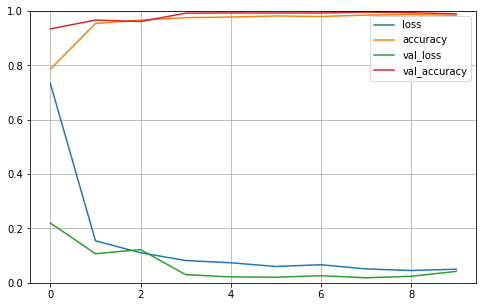

In [53]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [55]:
labels = labels.astype(int)
pred = model.predict(X_test) 
classes_x=np.argmax(pred,axis=1)
print(accuracy_score(labels, classes_x))

0.9803703703703703


In [56]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(labels, classes_x)

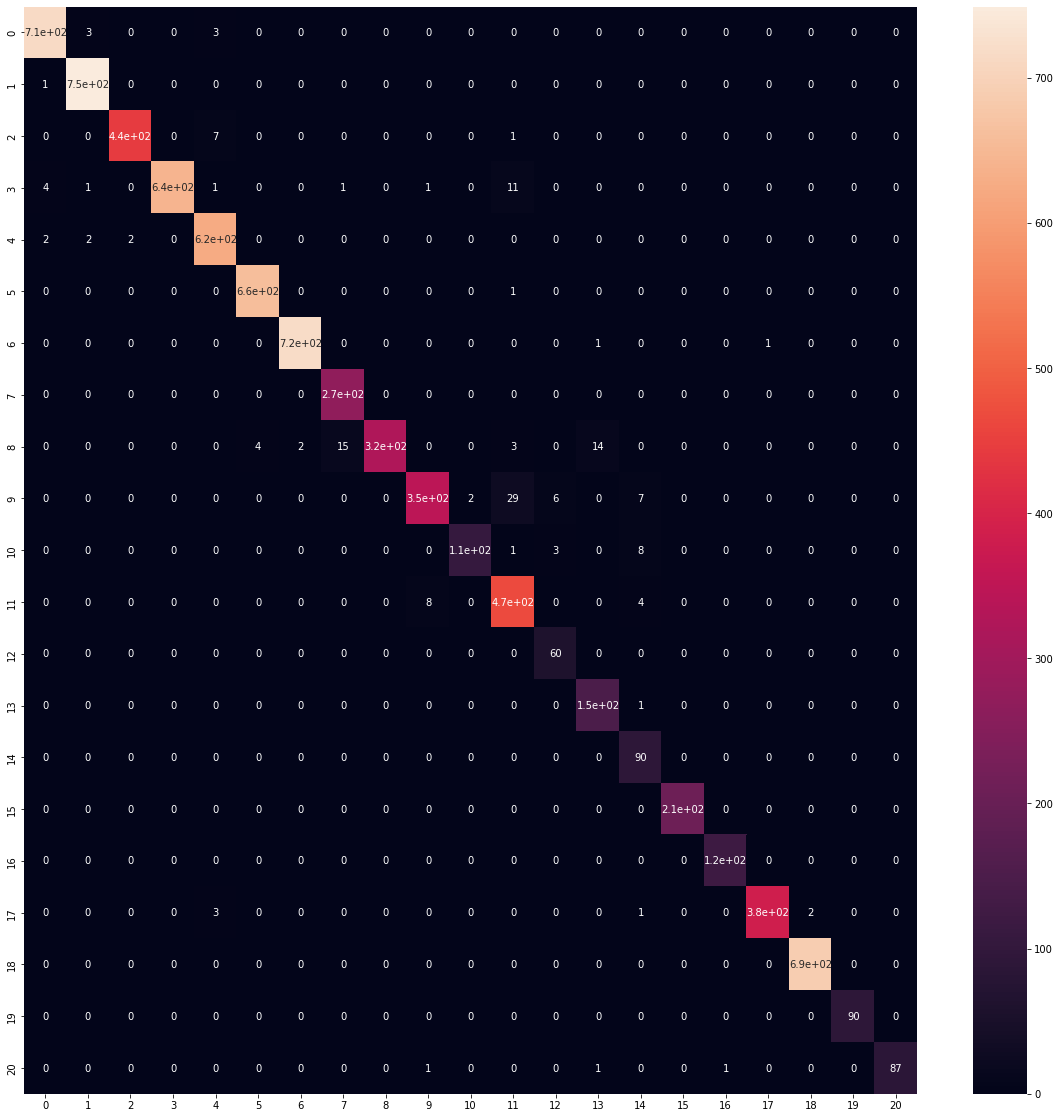

In [57]:
import seaborn as sns
df_cm = pd.DataFrame(cf, index = np.unique(labels),  columns = np.unique(labels))
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True)

In [58]:
from sklearn.metrics import classification_report
print(classification_report(labels, classes_x))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       720
           1       0.99      1.00      1.00       750
           2       1.00      0.98      0.99       450
           3       1.00      0.97      0.99       660
           4       0.98      0.99      0.98       630
           5       0.99      1.00      1.00       660
           6       1.00      1.00      1.00       720
           7       0.94      1.00      0.97       270
           8       1.00      0.89      0.94       360
           9       0.97      0.89      0.93       390
          10       0.98      0.90      0.94       120
          11       0.91      0.97      0.94       480
          12       0.87      1.00      0.93        60
          13       0.90      0.99      0.95       150
          14       0.81      1.00      0.90        90
          15       1.00      1.00      1.00       210
          16       0.99      1.00      1.00       120
          17       1.00    

vgg16

In [23]:
vgg16 = VGG16(input_shape=(32,32,3), weights='imagenet', include_top=False)
for layer in vgg16.layers:
    layer.trainable = False

58900480/58889256 [==============================] - 0s 0us/step


In [24]:
add_model = Sequential()
add_model.add(Flatten(input_shape=vgg16.output_shape[1:]))

add_model.add(Dense(512, activation='relu'))

add_model.add(Dense(y_train.shape[1], activation='softmax'))

model = Model(inputs=vgg16.input, outputs=add_model(vgg16.output))
def results(model):
  adam = Adam(learning_rate=lr)
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

Epoch 1/10
203/203 [==============================] - 304s 1s/step - loss: 1.3981 - accuracy: 0.5495 - val_loss: 1.0398 - val_accuracy: 0.6638
Epoch 2/10
203/203 [==============================] - 303s 1s/step - loss: 0.8975 - accuracy: 0.7046 - val_loss: 0.8287 - val_accuracy: 0.7244
Epoch 3/10
203/203 [==============================] - 308s 2s/step - loss: 0.7271 - accuracy: 0.7617 - val_loss: 0.6975 - val_accuracy: 0.7736
Epoch 4/10
203/203 [==============================] - 303s 1s/step - loss: 0.6218 - accuracy: 0.7953 - val_loss: 0.6196 - val_accuracy: 0.8044
Epoch 5/10
203/203 [==============================] - 307s 2s/step - loss: 0.5456 - accuracy: 0.8184 - val_loss: 0.5599 - val_accuracy: 0.8201
Epoch 6/10
203/203 [==============================] - 301s 1s/step - loss: 0.4901 - accuracy: 0.8405 - val_loss: 0.5210 - val_accuracy: 0.8317
Epoch 7/10
203/203 [==============================] - 307s 2s/step - loss: 0.4415 - accuracy: 0.8562 - val_loss: 0.5190 - val_accuracy: 0.8223

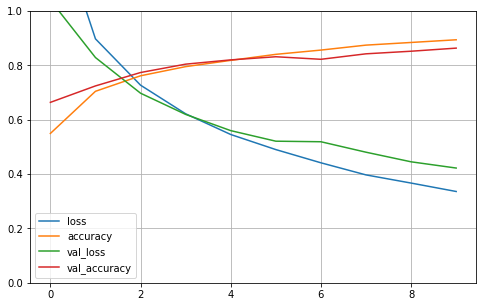

In [25]:
history = model.fit(X_train, y_train, batch_size=128, epochs=epochs,
validation_data=(X_valid, y_valid),callbacks=[es])

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # setting limits for y-axis
plt.show()

In [28]:
# make predictions
expected_y  = labels
predicted_y = model.predict(X_test)
pred_y=predicted_y.argmax(axis=1)



In [48]:


expected_y = expected_y.astype(int)
print(type(expected_y[0]))
print(type(pred_y[0]))

<class 'numpy.int64'>
<class 'numpy.int64'>


In [49]:
from sklearn import metrics
# summarize the fit of the model
print(metrics.classification_report(expected_y, pred_y))

              precision    recall  f1-score   support

           0       0.63      0.57      0.60       720
           1       0.45      0.41      0.43       750
           2       0.28      0.18      0.22       450
           3       0.40      0.56      0.46       660
           4       0.46      0.52      0.49       630
           5       0.92      0.77      0.84       660
           6       0.92      0.93      0.93       720
           7       0.89      0.90      0.90       270
           8       0.90      0.92      0.91       360
           9       0.60      0.63      0.62       390
          10       0.42      0.49      0.45       120
          11       0.59      0.64      0.61       480
          12       0.27      0.47      0.34        60
          13       0.34      0.24      0.28       150
          14       0.16      0.14      0.15        90
          15       0.57      0.42      0.49       210
          16       0.40      0.42      0.41       120
          17       0.65    

[[411 124  26  95  39   4   0   1   3   0   0   3   0   2   2   0   0   3
    7   0   0]
 [ 90 309  60 188  73   3   0   8   0   0   0   3   0   4   6   3   0   0
    3   0   0]
 [ 44  71  81 102  83  21   4   1   3   8   0  23   0   2   0   1   0   3
    3   0   0]
 [ 43  78  29 368 102   5   3   1   1   2   0   3   0   6   0   6   1   2
    9   0   1]
 [ 39  91  42 119 326   4   1   0   1   0   0   1   0   0   0   0   0   0
    6   0   0]
 [  5   2  24  36  73 510   1   0   0   0   0   5   0   1   0   0   0   1
    2   0   0]
 [  1   0   6   2   0   1 672   0   0   2   0   9   0   0   6   0   0   7
   13   1   0]
 [  1   5   0   1   0   0   0 244  14   0   0   0   0   0   1   0   0   4
    0   0   0]
 [  0   0   0   1   0   1   0  18 331   0   0   4   0   0   0   0   0   0
    5   0   0]
 [  1   0   0   0   0   0  17   0   3 247  20  49  26  13   5   1   1   3
    2   2   0]
 [  0   0   0   0   0   0   4   0   0   5  59  32   8   5   3   0   0   0
    4   0   0]
 [  0   1   0   0   0

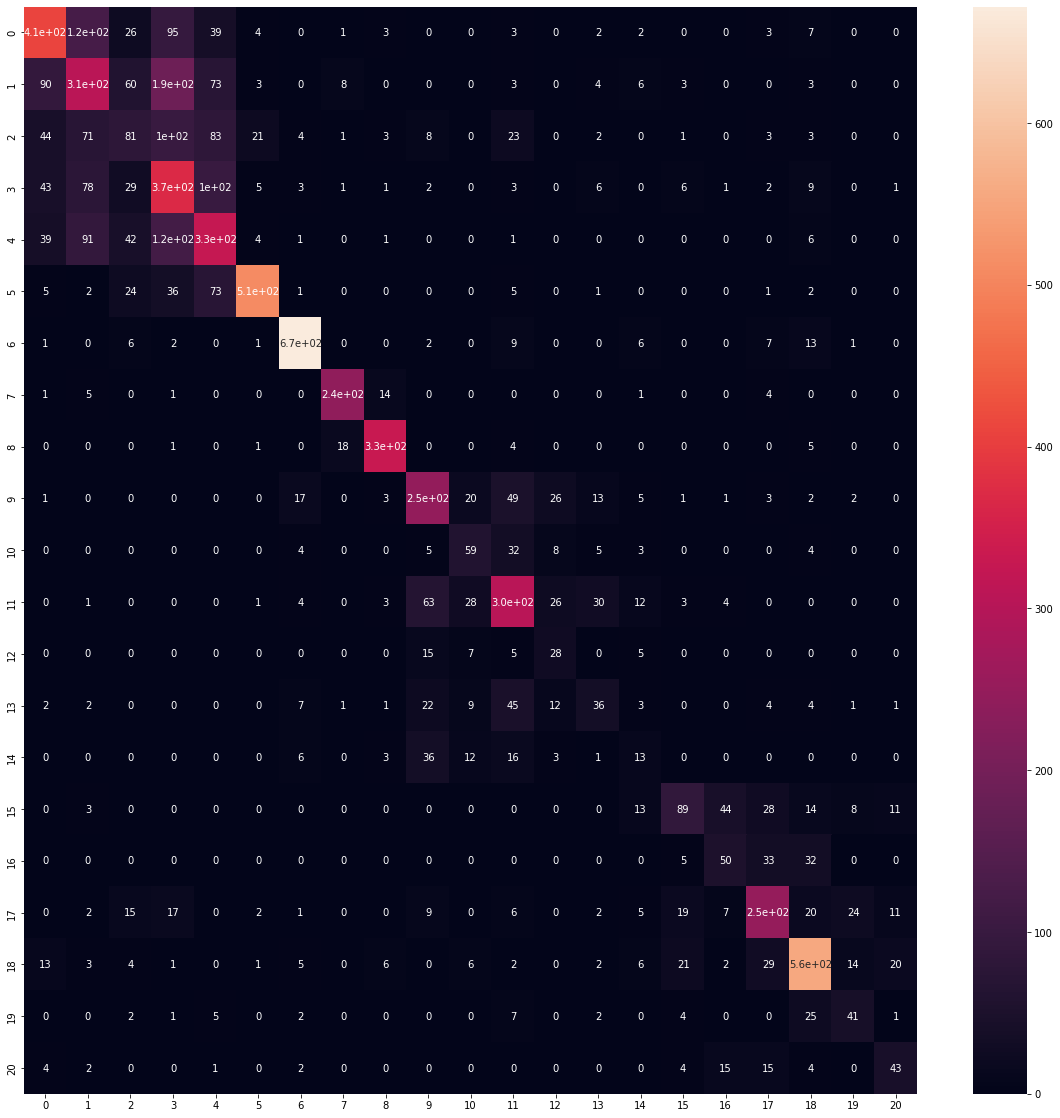

In [51]:
print(metrics.confusion_matrix(expected_y, pred_y))

import seaborn
df_cm= pd.DataFrame(metrics.confusion_matrix(expected_y, pred_y), index=np.unique(expected_y),columns= np.unique(expected_y))
plt.figure(figsize=(20,20))
seaborn.heatmap(df_cm, annot=True)